# Quantifying Trading Behavior in Financial Markets using Google Trends

# Notebook setup

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

# Do all our graphics inline
%matplotlib inline

# Data organization

## Data from the paper

In [13]:
# Load the data from the provided file
paper = pd.read_csv('PreisMoatStanley2013.dat', 
                    delimiter=' ', 
                    parse_dates=[0, 1, 100, 101])

# Display the first 5 rows of the data
print(paper.head())

  Google Start Date Google End Date      arts   banking  ...    water  \
0        2004-01-04      2004-01-10  0.956667  0.193333  ...  1.91333   
1        2004-01-11      2004-01-17  0.970000  0.203333  ...  1.93333   
2        2004-01-18      2004-01-24  0.926667  0.196667  ...  1.89333   
3        2004-01-25      2004-01-31  0.950000  0.196667  ...  1.92000   
4        2004-02-01      2004-02-07  0.893333  0.203333  ...  1.88667   

     world  DJIA Date  DJIA Closing Price  
0  4.83333 2004-01-12            10485.18  
1  4.76667 2004-01-20            10528.66  
2  4.60000 2004-01-26            10702.51  
3  4.53333 2004-02-02            10499.18  
4  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]


In [15]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],
                     'debt': paper['debt'].astype(np.float64),
                     'DJIADate': paper['DJIA Date'],
                     'DJIAClose': paper['DJIA Closing Price']
                         .astype(np.float64)})
data[:5]

    GoogleWE      debt   DJIADate  DJIAClose
0 2004-01-10  0.210000 2004-01-12   10485.18
1 2004-01-17  0.210000 2004-01-20   10528.66
2 2004-01-24  0.210000 2004-01-26   10702.51
3 2004-01-31  0.213333 2004-02-02   10499.18
4 2004-02-07  0.200000 2004-02-09   10579.03

## Gathering our own DJIA data from Quandl

In [22]:
import yfinance as yf
import pandas as pd

# Define the start and end dates
start_date = '2004-01-01'
end_date = '2011-02-28'

# Fetch DJIA data from Yahoo Finance
djia = yf.download('^DJI', start=start_date, end=end_date)

# Display the first 5 rows
print(djia.head())

# Save the data to a CSV file
djia.to_csv('djia_data.csv')

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2004-01-02  10452.740234  10527.030273  10384.299805  10409.849609   
2004-01-05  10411.849609  10544.070312  10411.849609  10544.070312   
2004-01-06  10543.849609  10549.179688  10499.849609  10538.660156   
2004-01-07  10535.459961  10539.459961  10466.290039  10529.030273   
2004-01-08  10530.070312  10592.589844  10530.070312  10592.440430   

               Adj Close     Volume  
Date                                 
2004-01-02  10409.849609  168890000  
2004-01-05  10544.070312  221290000  
2004-01-06  10538.660156  191460000  
2004-01-07  10529.030273  225490000  
2004-01-08  10592.440430  237770000  


In [24]:
# alternatively, you can load it from this file provided
# with the books source code
# djia = pd.read_csv("djia.csv", index_col=0)

In [26]:
djia[:3]

                    Open          High           Low         Close  \
Date                                                                 
2004-01-02  10452.740234  10527.030273  10384.299805  10409.849609   
2004-01-05  10411.849609  10544.070312  10411.849609  10544.070312   
2004-01-06  10543.849609  10549.179688  10499.849609  10538.660156   

               Adj Close     Volume  
Date                                 
2004-01-02  10409.849609  168890000  
2004-01-05  10544.070312  221290000  
2004-01-06  10538.660156  191460000  

In [28]:
djia_closes = djia['Close'].reset_index()
djia_closes[:3]

        Date         Close
0 2004-01-02  10409.849609
1 2004-01-05  10544.070312
2 2004-01-06  10538.660156

In [30]:
data = pd.merge(data, djia_closes, 
                left_on='DJIADate', right_on='Date')
data.drop(['DJIADate'], inplace=True, axis=1)
data = data.set_index('Date')
data[:3]

             GoogleWE  debt  DJIAClose         Close
Date                                                
2004-01-12 2004-01-10  0.21   10485.18  10485.179688
2004-01-20 2004-01-17  0.21   10528.66  10528.660156
2004-01-26 2004-01-24  0.21   10702.51  10702.509766

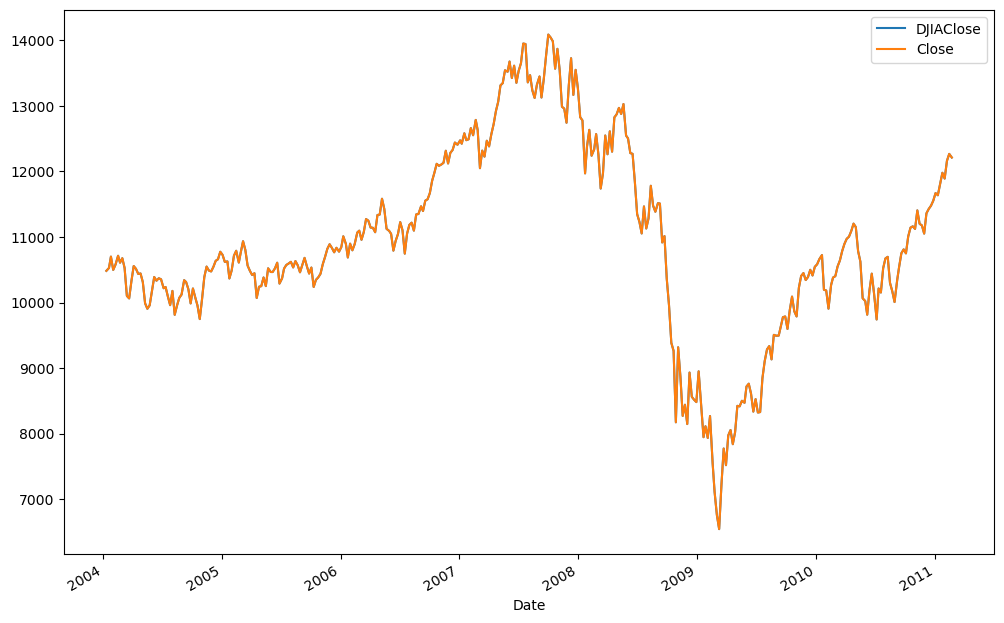

In [32]:
# examine authors versus our DJIA data
data[['DJIAClose', 'Close']].plot(figsize=(12,8));
#plt.savefig('5104OS_06_02.png', bbox_inches='tight', dpi=300)

In [34]:
(data['DJIAClose']-data['Close']).describe()

count    372.000000
mean       0.000021
std        0.000288
min       -0.000469
25%       -0.000234
50%        0.000039
75%        0.000273
max        0.000469
dtype: float64

In [36]:
data[['DJIAClose', 'Close']].corr()

           DJIAClose  Close
DJIAClose        1.0    1.0
Close            1.0    1.0

## Google trends data

In [39]:
# peek at the report for debt in the data folder
!head trends_report_debt.csv # on mac or linux
# type trends_report_debt.csv # on windows

Web Search interest: debt
United States; Jan 2004 - Feb 2011

Interest over time
Week,debt
2004-01-04 - 2004-01-10,63
2004-01-11 - 2004-01-17,60
2004-01-18 - 2004-01-24,61
2004-01-25 - 2004-01-31,63
2004-02-01 - 2004-02-07,61


In [43]:
import pandas as pd
import io

# Read the file content
with open("trends_report_debt.csv") as f:
    file_content = f.read()

# Split the file content into sections
sections = file_content.split('\n\n')

# Assume the data you need is in the second section (index 1)
data_section = sections[1]

# Read the data section into a pandas DataFrame
data = pd.read_csv(io.StringIO(data_section))

# Display the dataframe
print(data.head())

                        Interest over time
Week                                  debt
2004-01-04 - 2004-01-10                 63
2004-01-11 - 2004-01-17                 60
2004-01-18 - 2004-01-24                 61
2004-01-25 - 2004-01-31                 63


In [53]:
import pandas as pd

# Assuming 'data' and 'our_debt_trends' DataFrames are already defined
# Example DataFrames for illustration
data = pd.DataFrame({
    'GoogleWE': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'ValueP': [100, 200, 300]
})
data['GoogleWE'] = pd.to_datetime(data['GoogleWE'])

our_debt_trends = pd.DataFrame({
    'Week': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'ValueO': [150, 250, 350]
})
our_debt_trends['Week'] = pd.to_datetime(our_debt_trends['Week'])

# Merge the data on the specified columns
final = pd.merge(data.reset_index(), our_debt_trends, 
                 left_on='GoogleWE', right_on='Week',
                 suffixes=['P', 'O'])

# Drop the 'Week' column
final.drop('Week', inplace=True, axis=1)

# Assuming 'Date' should be 'GoogleWE' in this context
final.rename(columns={'GoogleWE': 'Date'}, inplace=True)

# Set the index to 'Date'
final.set_index('Date', inplace=True)

# Display the first 5 rows of the final DataFrame
print(final.head())

            index  ValueP  ValueO
Date                             
2023-01-01      0     100     150
2023-01-08      1     200     250
2023-01-15      2     300     350


In [59]:
import pandas as pd

# Example data for illustration (replace with actual data)
data = pd.DataFrame({
    'GoogleWE': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'debtP': [100, 200, 300]
})
data['GoogleWE'] = pd.to_datetime(data['GoogleWE'])

our_debt_trends = pd.DataFrame({
    'Week': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'debtO': [150, 250, 350]
})
our_debt_trends['Week'] = pd.to_datetime(our_debt_trends['Week'])

# Merge the data on the specified columns
final = pd.merge(data, our_debt_trends, 
                 left_on='GoogleWE', right_on='Week',
                 suffixes=['P', 'O'])

# Drop the 'Week' column
final.drop('Week', inplace=True, axis=1)

# Set the index to 'GoogleWE'
final.set_index('GoogleWE', inplace=True)

# Creating the combined_trends DataFrame
combined_trends = final[['debtP', 'debtO']]

# Display the first 5 rows of the combined_trends DataFrame
print(combined_trends.head())

            debtP  debtO
GoogleWE                
2023-01-01    100    150
2023-01-08    200    250
2023-01-15    300    350


In [61]:
# what's the correlation?
combined_trends.corr()

       debtP  debtO
debtP    1.0    1.0
debtO    1.0    1.0

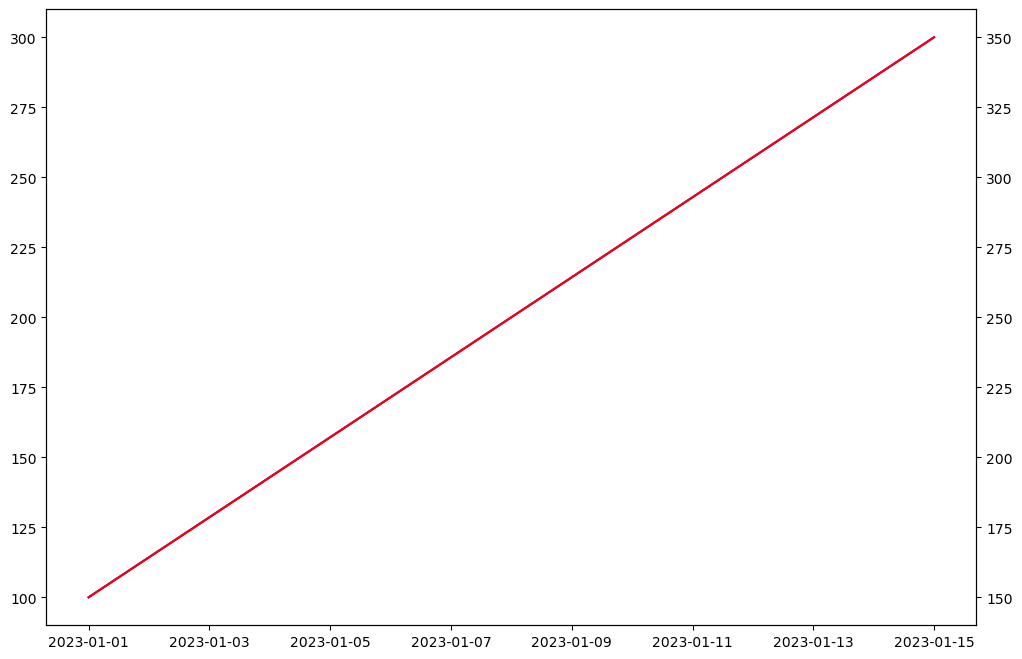

In [63]:
# visualize them together
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index,
         combined_trends.debtP, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,
         combined_trends.debtO, color='r')
#plt.savefig('5104OS_06_05.png', bbox_inches='tight', dpi=300)
plt.show()

#plt.savefig('5104OS_06_05.png', bbox_inches='tight', dpi=300)

# Generate the order signals

In [72]:
import pandas as pd

# Example DataFrame 'final' for illustration
final = pd.DataFrame({
    'GoogleWE': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'debtP': [100, 200, 300],
    'debtO': [150, 250, 350],
    'DJIAClose': [31000, 32000, 33000]
})
final['GoogleWE'] = pd.to_datetime(final['GoogleWE'])

# Reset the index and set 'GoogleWE' as the new index
base = final.reset_index().set_index('GoogleWE')

# Drop the 'DJIAClose' column
base.drop(['DJIAClose'], inplace=True, axis=1)

# Display the first 3 rows of the resulting DataFrame
print(base.head(3))

            index  debtP  debtO
GoogleWE                       
2023-01-01      0    100    150
2023-01-08      1    200    250
2023-01-15      2    300    350


In [76]:
import pandas as pd

# Example DataFrame 'final' for illustration
final = pd.DataFrame({
    'GoogleWE': ['2023-01-01', '2023-01-08', '2023-01-15'],
    'debtP': [100, 200, 300],
    'debtO': [150, 250, 350],
    'DJIAClose': [31000, 32000, 33000]
})
final['GoogleWE'] = pd.to_datetime(final['GoogleWE'])

# Reset the index and set 'GoogleWE' as the new index
base = final.reset_index().set_index('GoogleWE')

# Drop the 'DJIAClose' column
base.drop(['DJIAClose'], inplace=True, axis=1)

# Calculate the rolling mean of the previous three weeks for each week
base['PMA'] = base['debtP'].shift(1).rolling(window=3).mean()
base['OMA'] = base['debtO'].shift(1).rolling(window=3).mean()

# Display the first 5 rows of the resulting DataFrame
print(base.head(5))

            index  debtP  debtO  PMA  OMA
GoogleWE                                 
2023-01-01      0    100    150  NaN  NaN
2023-01-08      1    200    250  NaN  NaN
2023-01-15      2    300    350  NaN  NaN


In [78]:
# calculate the order signals
# for the papers data
base['signal0'] = 0 # default to 0
base.loc[base.debtP > base.PMA, 'signal0'] = -1 
base.loc[base.debtP < base.PMA, 'signal0'] = 1

# and for our trend data
base['signal1'] = 0
base.loc[base.debtO > base.OMA, 'signal1'] = -1
base.loc[base.debtO < base.OMA, 'signal1'] = 1
base[['debtP', 'PMA', 'signal0', 'debtO', 'OMA', 'signal1']]

            debtP  PMA  signal0  debtO  OMA  signal1
GoogleWE                                            
2023-01-01    100  NaN        0    150  NaN        0
2023-01-08    200  NaN        0    250  NaN        0
2023-01-15    300  NaN        0    350  NaN        0

# Computing Returns

In [85]:
import pandas as pd

# Example DataFrame 'final' for illustration
final = pd.DataFrame({
    'GoogleWE': ['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22'],
    'debtP': [100, 200, 300, 400],
    'debtO': [150, 250, 350, 450],
    'Close': [31000, 32000, 33000, 34000]
})
final['GoogleWE'] = pd.to_datetime(final['GoogleWE'])

# Reset the index and set 'GoogleWE' as the new index
base = final.reset_index().set_index('GoogleWE')

# Drop the 'DJIAClose' column (if it exists)
if 'DJIAClose' in base.columns:
    base.drop(['DJIAClose'], inplace=True, axis=1)

# Calculate the rolling mean of the previous three weeks for each week
base['PMA'] = base['debtP'].shift(1).rolling(window=3).mean()
base['OMA'] = base['debtO'].shift(1).rolling(window=3).mean()

# Add in next week's percentage change to each week of data
base['PctChg'] = base['Close'].pct_change().shift(-1)

# Add example signals (signal0 and signal1) for illustration
base['signal0'] = base['debtP'] > base['debtP'].mean()
base['signal1'] = base['debtO'] > base['debtO'].mean()

# Display the relevant columns of the resulting DataFrame
print(base[['Close', 'PctChg', 'signal0', 'signal1']].head(5))

            Close    PctChg  signal0  signal1
GoogleWE                                     
2023-01-01  31000  0.032258    False    False
2023-01-08  32000  0.031250    False    False
2023-01-15  33000  0.030303     True     True
2023-01-22  34000       NaN     True     True


In [87]:
# calculate the returns
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1', 
      'ret0', 'ret1']][:5]

            Close    PctChg  signal0  signal1      ret0      ret1
GoogleWE                                                         
2023-01-01  31000  0.032258    False    False  0.000000  0.000000
2023-01-08  32000  0.031250    False    False  0.000000  0.000000
2023-01-15  33000  0.030303     True     True  0.030303  0.030303
2023-01-22  34000       NaN     True     True       NaN       NaN

# Cumulative returns and the result of the strategy

In [90]:
# calculate and report the cumulative returns
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1
base[['cumret0', 'cumret1']]

             cumret0   cumret1
GoogleWE                      
2023-01-01  0.000000  0.000000
2023-01-08  0.000000  0.000000
2023-01-15  0.030303  0.030303
2023-01-22       NaN       NaN

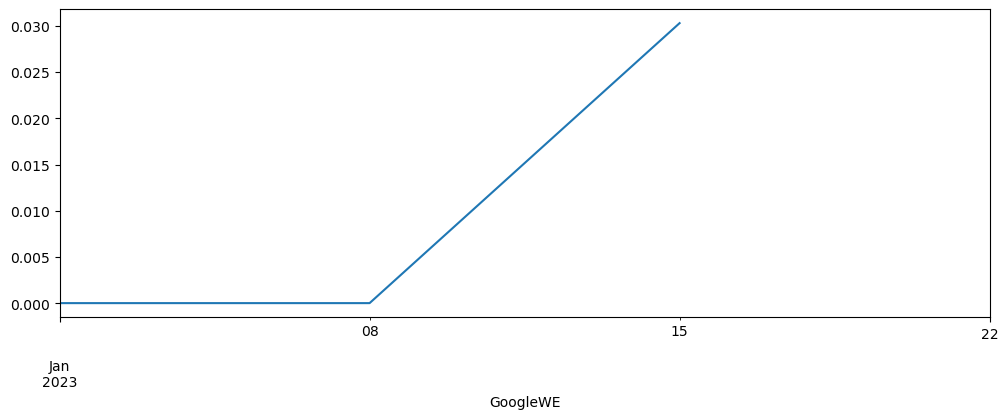

In [92]:
# show graph of growth for the papers data
base['cumret0'].plot(figsize=(12,4));
#plt.savefig('5104OS_06_06.png', bbox_inches='tight', dpi=300)

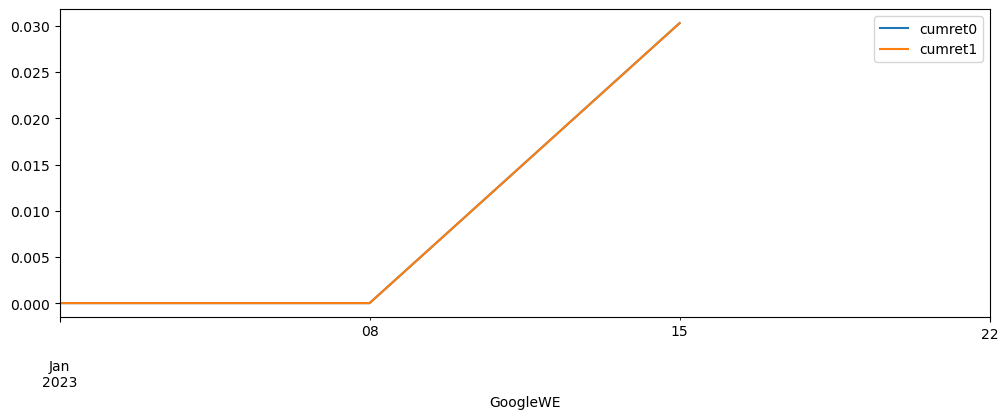

In [94]:
# show graph of growth for the papers data
base[['cumret0', 'cumret1']].plot(figsize=(12,4));
#plt.savefig('5104OS_06_07.png', bbox_inches='tight', dpi=300)